# 1.	THUCNews中文数据集

数据集的说明：
THUCNews是根据新浪新闻RSS订阅频道2005~2011年间的历史数据筛选过滤生成，包含74万篇新闻文档（2.19 GB），均为UTF-8纯文本格式。我们在原始新浪新闻分类体系的基础上，重新整合划分出14个候选分类类别：财经、彩票、房产、股票、家居、教育、科技、社会、时尚、时政、体育、星座、游戏、娱乐。使用THUCTC工具包在此数据集上进行评测，准确率可以达到88.6%。参考链接：http://thuctc.thunlp.org/

数据集的下载：
https://pan.baidu.com/s/1hugrfRu 密码：qfud

# 2.	IMDB英文数据集

IMDB数据集包含有2.5万条电影评论，被标记为积极和消极。影评会经过预处理，把每一条影评编码为一个词索引(数字)sequence。为了方便起见，单词根据在整个数据集中的出现频率大小建立索引，所以”3”就代表在数据中出现频率第三的单词。这样可以快速筛选出想要的结果，比如想要top10000，但是排除top20的单词。

探索：参考了gaussic的github：https://github.com/gaussic/keras-examples
Keras的官方Examples里面展示了四种训练IMDB文本情感分类的方法，借助这4个Python程序,分别从4个方面：LSTM,CNN,LSTM-CNN和FASTTEXT

# imdb_cnn

In [1]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Convolution1D, GlobalMaxPooling1D
from keras.datasets import imdb


# set parameters:  设定参数
max_features = 5000  # 最大特征数（词汇表大小）
maxlen = 400         # 序列最大长度
batch_size = 32      # 每批数据量大小
embedding_dims = 50  # 词嵌入维度
nb_filter = 250      # 1维卷积核个数
filter_length = 3    # 卷积核长度
hidden_dims = 250    # 隐藏层维度
nb_epoch = 10        # 迭代次数

# 载入 imdb 数据
print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

# 样本填充到固定长度 maxlen，在每个样本前补 0 
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

# 构建模型
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
# 先从一个高效的嵌入层开始，它将词汇的索引值映射为 embedding_dims 维度的词向量
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen,
                    dropout=0.2))

# we add a Convolution1D, which will learn nb_filter
# word group filters of size filter_length:
# 添加一个 1D 卷积层，它将学习 nb_filter 个 filter_length 大小的词组卷积核
model.add(Convolution1D(nb_filter=nb_filter,
                        filter_length=filter_length,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))
# we use max pooling:
# 使用最大池化
model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
# 添加一个原始隐藏层
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
# 投影到一个单神经元的输出层，并且使用 sigmoid 压缩它
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()  # 模型概述

# 定义损失函数，优化器，评估矩阵
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 训练，迭代 nb_epoch 次
model.fit(X_train, y_train,
          batch_size=batch_size,
          nb_epoch=nb_epoch,
          validation_data=(X_test, y_test))

Using TensorFlow backend.


Loading data...


D:\Program Files (x86)\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\datasets\imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


25000 train sequences
25000 test sequences
Pad sequences (samples x time)
X_train shape: (25000, 400)
X_test shape: (25000, 400)
Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 50)           250000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 398, 250)          37750     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0        

D:\Program Files (x86)\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:46: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
D:\Program Files (x86)\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:55: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=250, kernel_size=3, strides=1, padding="valid")`
D:\Program Files (x86)\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:82: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 36s 1ms/step - loss: 0.3810 - acc: 0.8146 - val_loss: 0.2918 - val_acc: 0.8775
Epoch 2/10
25000/25000 [==============================] - 27s 1ms/step - loss: 0.2002 - acc: 0.9213 - val_loss: 0.2768 - val_acc: 0.8848
Epoch 3/10
25000/25000 [==============================] - 27s 1ms/step - loss: 0.1113 - acc: 0.9608 - val_loss: 0.2864 - val_acc: 0.8923
Epoch 4/10
25000/25000 [==============================] - 27s 1ms/step - loss: 0.0464 - acc: 0.9855 - val_loss: 0.4272 - val_acc: 0.8784
Epoch 5/10
25000/25000 [==============================] - 27s 1ms/step - loss: 0.0212 - acc: 0.9935 - val_loss: 0.5466 - val_acc: 0.8731
Epoch 6/10
25000/25000 [==============================] - 27s 1ms/step - loss: 0.0205 - acc: 0.9929 - val_loss: 0.5252 - val_acc: 0.8855
Epoch 7/10
25000/25000 [==============================] - 27s 1ms/step - loss: 0.0180 - acc: 0.9936 - val_loss: 0.5358 - val_acc

# imdb_cnn_lstm

In [3]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Convolution1D, MaxPooling1D
from keras.datasets import imdb


# Embedding  词嵌入
max_features = 20000   # 词汇表大小
maxlen = 100           # 序列最大长度
embedding_size = 128   # 词向量维度
  
# Convolution  卷积
filter_length = 5    # 滤波器长度
nb_filter = 64       # 滤波器个数
pool_length = 4      # 池化长度

# LSTM
lstm_output_size = 70   # LSTM 层输出尺寸

# Training   训练参数
batch_size = 30   # 批数据量大小
nb_epoch = 10      # 迭代次数

'''
Note:
batch_size is highly sensitive.
Only 2 epochs are needed as the dataset is very small.
注意：
batch_size 这个值非常敏感。
由于数据集很小，所有2轮迭代足够了。
'''

# 载入模型
print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

# 填充到固定长度 maxlen
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

print('Build model...')
# 构建模型
model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))  # 词嵌入层
model.add(Dropout(0.25))       # Dropout层

# 1D 卷积层，对词嵌入层输出做卷积操作
model.add(Convolution1D(nb_filter=nb_filter,
                        filter_length=filter_length,
                        border_mode='valid',
                        activation='relu',
                        subsample_length=1))
# 池化层
model.add(MaxPooling1D(pool_length=pool_length))
# LSTM 循环层
model.add(LSTM(lstm_output_size))
# 全连接层，只有一个神经元，输入是否为正面情感值
model.add(Dense(1))
model.add(Activation('sigmoid'))  # sigmoid判断情感

model.summary()   # 模型概述

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 训练
print('Train...')
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=nb_epoch,
          validation_data=(X_test, y_test))

# 测试
score, acc = model.evaluate(X_test, y_test, batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...


D:\Program Files (x86)\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\datasets\imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


25000 train sequences
25000 test sequences
Pad sequences (samples x time)
X_train shape: (25000, 100)
X_test shape: (25000, 100)
Build model...


D:\Program Files (x86)\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:64: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(activation="relu", filters=64, kernel_size=5, strides=1, padding="valid")`
D:\Program Files (x86)\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:66: UserWarning: Update your `MaxPooling1D` call to the Keras 2 API: `MaxPooling1D(pool_size=4)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
dropout_3 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 96, 64)            41024     
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 24, 64)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 70)                37800     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 71        
_________________________________________________________________
activation_4 (Activation)    (None, 1)                 0         
Total para

D:\Program Files (x86)\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:81: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 25000 samples, validate on 25000 samples
Epoch 1/10
25000/25000 [==============================] - 74s 3ms/step - loss: 0.3867 - acc: 0.8192 - val_loss: 0.3442 - val_acc: 0.8471
Epoch 2/10
25000/25000 [==============================] - 72s 3ms/step - loss: 0.1985 - acc: 0.9242 - val_loss: 0.3432 - val_acc: 0.8582
Epoch 3/10
25000/25000 [==============================] - 73s 3ms/step - loss: 0.0949 - acc: 0.9670 - val_loss: 0.4041 - val_acc: 0.8444
Epoch 4/10
25000/25000 [==============================] - 72s 3ms/step - loss: 0.0420 - acc: 0.9862 - val_loss: 0.5997 - val_acc: 0.8398
Epoch 5/10
25000/25000 [==============================] - 73s 3ms/step - loss: 0.0246 - acc: 0.9916 - val_loss: 0.6983 - val_acc: 0.8331
Epoch 6/10
25000/25000 [==============================] - 73s 3ms/step - loss: 0.0205 - acc: 0.9933 - val_loss: 0.7550 - val_acc: 0.8204
Epoch 7/10
25000/25000 [==============================] - 72s 3ms/step - loss: 0.0157 - acc: 0.9949 - val_loss: 0.6665 - val_acc

# imdb_fasttext

In [4]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Embedding
from keras.layers import GlobalAveragePooling1D
from keras.datasets import imdb


# 构建 ngram 数据集
def create_ngram_set(input_list, ngram_value=2):
    """
    Extract a set of n-grams from a list of integers.
    从一个整数列表中提取  n-gram 集合。
    >>> create_ngram_set([1, 4, 9, 4, 1, 4], ngram_value=2)
    {(4, 9), (4, 1), (1, 4), (9, 4)}
    >>> create_ngram_set([1, 4, 9, 4, 1, 4], ngram_value=3)
    [(1, 4, 9), (4, 9, 4), (9, 4, 1), (4, 1, 4)]
    """
    return set(zip(*[input_list[i:] for i in range(ngram_value)]))


def add_ngram(sequences, token_indice, ngram_range=2):
    """
    Augment the input list of list (sequences) by appending n-grams values.
    增广输入列表中的每个序列，添加 n-gram 值
    Example: adding bi-gram
    >>> sequences = [[1, 3, 4, 5], [1, 3, 7, 9, 2]]
    >>> token_indice = {(1, 3): 1337, (9, 2): 42, (4, 5): 2017}
    >>> add_ngram(sequences, token_indice, ngram_range=2)
    [[1, 3, 4, 5, 1337, 2017], [1, 3, 7, 9, 2, 1337, 42]]
    Example: adding tri-gram
    >>> sequences = [[1, 3, 4, 5], [1, 3, 7, 9, 2]]
    >>> token_indice = {(1, 3): 1337, (9, 2): 42, (4, 5): 2017, (7, 9, 2): 2018}
    >>> add_ngram(sequences, token_indice, ngram_range=3)
    [[1, 3, 4, 5, 1337], [1, 3, 7, 9, 2, 1337, 2018]]
    """
    new_sequences = []
    for input_list in sequences:
        new_list = input_list[:]
        for i in range(len(new_list) - ngram_range + 1):
            for ngram_value in range(2, ngram_range + 1):
                ngram = tuple(new_list[i:i + ngram_value])
                if ngram in token_indice:
                    new_list.append(token_indice[ngram])
        new_sequences.append(new_list)

    return new_sequences

# Set parameters: 设定参数
# ngram_range = 2 will add bi-grams features ngram_range=2会添加二元特征
ngram_range = 1
max_features = 20000  # 词汇表大小
maxlen = 400          # 序列最大长度
batch_size = 32       # 批数据量大小
embedding_dims = 50   # 词向量维度
nb_epoch = 5          # 迭代轮次

# 载入 imdb 数据
print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')
print('Average train sequence length: {}'.format(
    np.mean(list(map(len, X_train)), dtype=int)))
print('Average test sequence length: {}'.format(
    np.mean(list(map(len, X_test)), dtype=int)))


if ngram_range > 1:
    print('Adding {}-gram features'.format(ngram_range))
    # Create set of unique n-gram from the training set.
    ngram_set = set()
    for input_list in X_train:
        for i in range(2, ngram_range + 1):
            set_of_ngram = create_ngram_set(input_list, ngram_value=i)
            ngram_set.update(set_of_ngram)

    # Dictionary mapping n-gram token to a unique integer. 将 ngram token 映射到独立整数的词典
    # Integer values are greater than max_features in order
    # to avoid collision with existing features.
    # 整数大小比 max_features 要大，按顺序排列，以避免与已存在的特征冲突
    start_index = max_features + 1
    token_indice = {v: k + start_index for k, v in enumerate(ngram_set)}
    indice_token = {token_indice[k]: k for k in token_indice}

    # max_features is the highest integer that could be found in the dataset.
    # max_features 是可以在数据集中找到的最大的整数
    max_features = np.max(list(indice_token.keys())) + 1

    # Augmenting X_train and X_test with n-grams features
    # 使用 n-gram 特征增广 X_train 和 X_test
    X_train = add_ngram(X_train, token_indice, ngram_range)
    X_test = add_ngram(X_test, token_indice, ngram_range)
    print('Average train sequence length: {}'.format(
        np.mean(list(map(len, X_train)), dtype=int)))
    print('Average test sequence length: {}'.format(
        np.mean(list(map(len, X_test)), dtype=int)))

# 填充序列至固定长度
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

# 构建模型
print('Build model...')
model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
# 先从一个高效的嵌入层开始，它将词汇表索引映射到 embedding_dim 维度的向量上
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))

# we add a GlobalAveragePooling1D, which will average the embeddings
# of all words in the document
# 添加一个 GlobalAveragePooling1D 层，它将平均整个序列的词嵌入
model.add(GlobalAveragePooling1D())

# We project onto a single unit output layer, and squash it with a sigmoid:
# 投影到一个单神经元输出层，然后使用 sigmoid 挤压。
model.add(Dense(1, activation='sigmoid'))

model.summary()  # 概述

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 训练与验证
model.fit(X_train, y_train,
          batch_size=batch_size,
          nb_epoch=nb_epoch,
          validation_data=(X_test, y_test))

Loading data...


D:\Program Files (x86)\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\datasets\imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


25000 train sequences
25000 test sequences
Average train sequence length: 238
Average test sequence length: 230
Pad sequences (samples x time)
X_train shape: (25000, 400)
X_test shape: (25000, 400)
Build model...
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 400, 50)           1000000   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 1,000,051
Trainable params: 1,000,051
Non-trainable params: 0
_________________________________________________________________


D:\Program Files (x86)\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:140: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 10s 389us/step - loss: 0.6123 - acc: 0.7436 - val_loss: 0.5048 - val_acc: 0.8227
Epoch 2/5
25000/25000 [==============================] - 9s 371us/step - loss: 0.4057 - acc: 0.8634 - val_loss: 0.3738 - val_acc: 0.8646
Epoch 3/5
25000/25000 [==============================] - 9s 369us/step - loss: 0.3061 - acc: 0.8934 - val_loss: 0.3219 - val_acc: 0.8783
Epoch 4/5
25000/25000 [==============================] - 9s 365us/step - loss: 0.2550 - acc: 0.9110 - val_loss: 0.2970 - val_acc: 0.8853
Epoch 5/5
25000/25000 [==============================] - 9s 369us/step - loss: 0.2206 - acc: 0.9248 - val_loss: 0.2843 - val_acc: 0.8879


# imdb_lstm

In [5]:
from __future__ import print_function
import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Activation, Embedding
from keras.layers import LSTM
from keras.datasets import imdb

# 设定参数
max_features = 20000   # 词汇表大小
# cut texts after this number of words (among top max_features most common words)
# 裁剪文本为 maxlen 大小的长度（取最后部分，基于前 max_features 个常用词）
maxlen = 80  
batch_size = 32   # 批数据量大小

# 载入数据
print('Loading data...')
(X_train, y_train), (X_test, y_test) = imdb.load_data(nb_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

# 裁剪为 maxlen 长度
print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

# 构建模型
print('Build model...')
model = Sequential()
# 嵌入层，每个词维度为128
model.add(Embedding(max_features, 128, dropout=0.2))
# LSTM层，输出维度128，可以尝试着换成 GRU 试试
model.add(LSTM(128, dropout_W=0.2, dropout_U=0.2))  # try using a GRU instead, for fun
model.add(Dense(1))   # 单神经元全连接层
model.add(Activation('sigmoid'))   # sigmoid 激活函数层

model.summary()   # 模型概述

# try using different optimizers and different optimizer configs
# 这里可以尝试使用不同的损失函数和优化器
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 训练，迭代 15 次，使用测试集做验证（真正实验时最好不要这样做）
print('Train...')
model.fit(X_train, y_train, batch_size=batch_size, nb_epoch=15,
          validation_data=(X_test, y_test))

# 评估误差和准确率
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Loading data...


D:\Program Files (x86)\Anaconda3\envs\tensorflow-gpu\lib\site-packages\keras\datasets\imdb.py:49: UserWarning: The `nb_words` argument in `load_data` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `load_data` '


25000 train sequences
25000 test sequences
Pad sequences (samples x time)
X_train shape: (25000, 80)
X_test shape: (25000, 80)
Build model...


D:\Program Files (x86)\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:35: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
D:\Program Files (x86)\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:37: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(128, dropout=0.2, recurrent_dropout=0.2)`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 128)         2560000   
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_5 (Activation)    (None, 1)                 0         
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________
Train...


D:\Program Files (x86)\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:52: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 138s 6ms/step - loss: 0.4591 - acc: 0.7833 - val_loss: 0.3988 - val_acc: 0.8195
Epoch 2/15
25000/25000 [==============================] - 137s 5ms/step - loss: 0.3007 - acc: 0.8766 - val_loss: 0.3730 - val_acc: 0.8356
Epoch 3/15
25000/25000 [==============================] - 137s 5ms/step - loss: 0.2198 - acc: 0.9138 - val_loss: 0.4112 - val_acc: 0.8200
Epoch 4/15
25000/25000 [==============================] - 137s 5ms/step - loss: 0.1500 - acc: 0.9431 - val_loss: 0.4578 - val_acc: 0.8227
Epoch 5/15
25000/25000 [==============================] - 137s 5ms/step - loss: 0.1113 - acc: 0.9590 - val_loss: 0.5995 - val_acc: 0.8165
Epoch 6/15
25000/25000 [==============================] - 137s 5ms/step - loss: 0.0756 - acc: 0.9732 - val_loss: 0.6217 - val_acc: 0.8202
Epoch 7/15
25000/25000 [==============================] - 141s 6ms/step - loss: 0.0553 - acc: 0.9812 - val_loss: 0.7186 - 

# 3.	评价指标

# 精确率和召回率

 精确率和召回率主要用于二分类问题（从其公式推导也可看出），结合混淆矩阵有
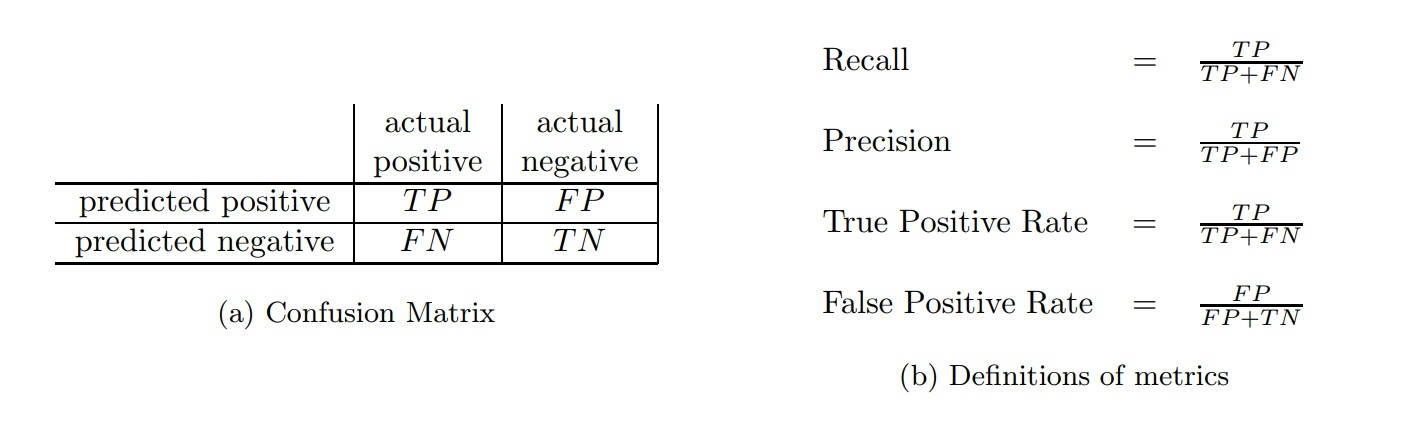

# PR曲线

以召回率R为横轴、以精确率P为纵轴，能够画出P-R曲线，如下图：
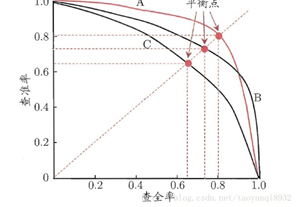
precision与Recall的折中(trade off)，曲线越靠近右上角性能越好，曲线下的面积叫AP分数，能在一定程度上反应模型的精确率和召回率都很高的比例。但这个值不方便计算，综合考虑精度与召回率一般使用F1函数或者AUC值

# ROC曲线(Receiver Operating Characteristic, ROC)

ROC曲线纵坐标是真正率TPR，横坐标是假正率FPR，不需要设定分类阈值
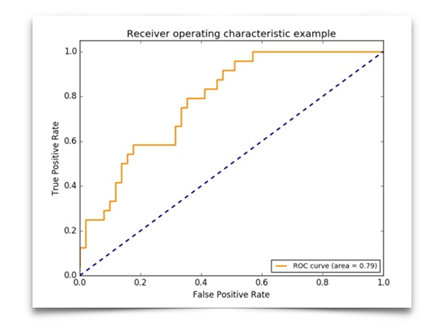
ROC曲线越靠近左上角性能越好

# AUC（Area under curve）

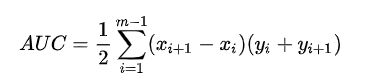

AUC就是ROC曲线下的面积，衡量学习器优劣的一种性能指标，只能用于二分类模型的评价，AUC和logloss基本是最常见的模型评价指标，因为很多机器学习的模型对分类问题的预测结果都是概率，如果要计算accuracy，需要先把概率转化成类别，这就需要手动设置一个阈值，如果对一个样本的预测概率高于这个预测，就把这个样本放进一个类别里面，低于这个阈值，放进另一个类别里面。所以这个阈值很大程度上影响了accuracy的计算。使用AUC或者logloss可以避免把预测概率转换成类别。

这个面积的数值不会大于1。又由于ROC曲线一般都处于y=x这条直线的上方，所以AUC的取值范围一般在0.5和1之间。使用AUC值作为评价标准是因为很多时候ROC曲线并不能清晰的说明哪个分类器的效果更好，而作为一个数值，对应AUC更大的分类器效果更好。

计算AUC

In [6]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true, y_scores)


0.75

ROC曲线

In [7]:
from sklearn.metrics import roc_curve
y = np.array([1, 1, 2, 2])
scores = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = roc_curve(y, scores, pos_label=2)